In [75]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    BaggingClassifier, 
    RandomForestClassifier, 
    ExtraTreesClassifier, 
    AdaBoostClassifier,
    StackingClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier
)

# to do PCA 
from sklearn.decomposition import PCA

# for cross validation
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

import sklearn.metrics as metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

from joblib import dump
from joblib import load

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
# To tune a model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config

set_config(display='diagram')

In [76]:
df = pd.read_csv('fulvestrantTrain.tsv', sep='\t')

In [77]:
df.head()

,Fulvestrant_response,type,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,...,rna_MAFIP,rna_CD24,rna_HLA-DRB3,rna_LOC389831,rna_MGC70870,rna_LOC100233156,rna_LOC389834,rna_LOC283788,rna_RNA5-8S5,rna_LOC102723780
Breast_SQ68,1,Breast,0,0,0,0,0,0,1,0,...,1.765641,3.610263,0.000000,0.144895,0.109381,0.000000,0.377070,0.743830,7.430427,0.379076
Breast_EI813,0,Breast,0,0,0,0,0,0,0,0,...,0.683720,1.901263,0.000000,1.973497,0.560144,0.763473,0.508316,1.166169,9.509599,1.445901
Breast_PV9,1,Breast,0,0,0,0,1,0,1,0,...,2.985080,4.125750,0.160901,1.316661,0.265797,1.167377,1.316250,1.320358,7.672418,0.230426
Breast_KY76,0,Breast,0,0,0,0,0,0,0,0,...,0.442882,0.320471,0.077141,3.301013,0.063881,0.323250,0.515944,0.272920,4.727648,0.222489
Breast_EPQV2,1,Breast,0,0,0,1,0,1,0,0,...,3.361561,7.317910,0.071225,2.624524,0.108735,1.402040,1.296005,1.550906,10.491553,2.474496


In [78]:
df.columns = df.columns.str.replace('.', '-')

C:\Users\madhu\AppData\Local\Temp/ipykernel_25956/2875486294.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '-')


In [79]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df.head()

,Fulvestrant_response,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,mut_MACF1,...,rna_RNA5-8S5,rna_LOC102723780,type_Bowel,type_BrainCNS,type_Breast,type_Kidney,type_Lung,type_Ovary,type_Prostate,type_Skin
Breast_SQ68,1,0,0,0,0,0,0,1,0,0,...,7.430427,0.379076,0,0,1,0,0,0,0,0
Breast_EI813,0,0,0,0,0,0,0,0,0,0,...,9.509599,1.445901,0,0,1,0,0,0,0,0
Breast_PV9,1,0,0,0,0,1,0,1,0,0,...,7.672418,0.230426,0,0,1,0,0,0,0,0
Breast_KY76,0,0,0,0,0,0,0,0,0,0,...,4.727648,0.222489,0,0,1,0,0,0,0,0
Breast_EPQV2,1,0,0,0,1,0,1,0,0,0,...,10.491553,2.474496,0,0,1,0,0,0,0,0


In [80]:
# variances = df.var()

# # Get column indices where variance is zero
# zero_variance_cols = variances[variances == 0].index

In [81]:
# # Drop columns with zero variance
# df = df.drop(columns=zero_variance_cols)
# df.shape

# SPLITTING 

In [82]:
X = df.drop('Fulvestrant_response', axis = 1)
y = df['Fulvestrant_response']

In [83]:
y.value_counts()

0    40
1     8
Name: Fulvestrant_response, dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify = y)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 38
Number of rows in test data = 10


In [85]:
y_test.value_counts()

0    8
1    2
Name: Fulvestrant_response, dtype: int64

# SCALING

In [86]:
scaler = MinMaxScaler()
 
# Scale the Data
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [87]:
X_train.head()

,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,mut_MACF1,mut_CDCP2,...,rna_RNA5-8S5,rna_LOC102723780,type_Bowel,type_BrainCNS,type_Breast,type_Kidney,type_Lung,type_Ovary,type_Prostate,type_Skin
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.871803,0.165485,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.761597,0.195150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.517093,0.411453,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.266880,0.122572,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.838300,0.506779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# OVER-SAMPLING 1s in TARGET

In [88]:
# Assign y_train as a new column to X_train DataFrame
X_train['TargetColumn'] = y_train.values

In [89]:
#weights = [10 if TargetColumn > 0.5 else 1 for TargetColumn in X_train.TargetColumn]
sample = X_train[X_train['TargetColumn'] == 1].sample(100, replace=True)
sample.head()

,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,mut_MACF1,mut_CDCP2,...,rna_LOC102723780,type_Bowel,type_BrainCNS,type_Breast,type_Kidney,type_Lung,type_Ovary,type_Prostate,type_Skin,TargetColumn
12,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.137213,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.411453,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.041530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.895683,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
17,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [90]:
sample['TargetColumn'].value_counts()

1    100
Name: TargetColumn, dtype: int64

In [91]:
# Oversample the minority class by duplicating samples
oversampled = pd.concat([X_train, sample], axis=0, ignore_index=True)
oversampled.shape

(138, 15997)

In [92]:
# Shuffle the DataFrame using sample() method
shuffled_df = oversampled.sample(frac=1, random_state=42) 
# Reset the index if needed
shuffled_df.reset_index(drop=True, inplace=True)

In [93]:
X_train = shuffled_df.drop('TargetColumn', axis = 1)
y_train = shuffled_df['TargetColumn'].values

# MODELLING PART

# Lasso Logistic Regression

In [94]:
# Create a Logistic Regression model with L1 (Lasso) regularization
lasso_logreg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  # Adjust C for regularization strength

# Fit the model on the training data
lasso_logreg.fit(X_train, y_train)

# Save the trained model to a file
dump(lasso_logreg, 'fulv_lasso.joblib')

# Predict on the train set
y_pred_train = lasso_logreg.predict(X_train)
# Predict on the test set
y_pred = lasso_logreg.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on train:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test:", accuracy)

Accuracy on train: 1.0
Accuracy on test: 0.8


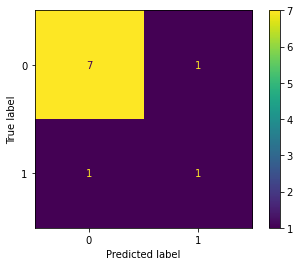

In [95]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [96]:
# Retrieve coefficients and intercept
coefficients = lasso_logreg.coef_
intercept = lasso_logreg.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[0.         0.         0.65191749 ... 0.         0.         0.        ]]
Intercept: [0.]


In [97]:
# Retrieve coefficients greater than zero and their column indices
coefficients = lasso_logreg.coef_[0]  # Assuming binary classification, extracting coefficients for the first class

non_zero_coefficients = [(index, coef) for index, coef in enumerate(coefficients) if coef != 0]

sorted_coefficients = sorted(non_zero_coefficients, key=lambda x: abs(x[1]), reverse=True)

print("Coefficients:")
for index, coef in sorted_coefficients:
    print(f"{X_train.columns[index]}: {coef}")

Coefficients:
rna_SNORA52: -1.7996688856426257
rna_ZFPM2-AS1: -0.8539953955484492
mut_LRP1B: -0.796900700002735
rna_SNORA71A: -0.7648461356905281
rna_SULF2: -0.7467868476889847
rna_KCNQ4: 0.6861236200356977
mut_H6PD: 0.6519174854632422
type_Breast: 0.5972283865394459
rna_RSPO1: 0.5865995451658007
rna_ASPH: -0.5773104426268487
rna_EPB41L4A-AS1: 0.5742789590169345
rna_GPR132: 0.5196523053764772
rna_TMED7-TICAM2: -0.5048053711409703
rna_IRF2BP2: 0.46652934643727456
rna_ASB9: -0.4562168084418275
rna_MTL5: 0.45151434029785875
rna_CLIP4: -0.40009632312862864
rna_ARAP3: -0.3801414642164235
rna_RNF5P1: 0.3548201680059039
rna_CCDC42B: 0.32963313260205185
rna_HOXD8: -0.3227127176523285
rna_FRAT2: 0.31262108357748086
rna_SLMO2-ATP5E: -0.29216244695245086
rna_SNHG17: 0.28618205254723683
rna_TNC: -0.21447986660462975
mut_TP53: 0.19647901775544951
rna_EIF4EBP3: 0.19383464424986574
rna_MPRIP: -0.17850038658161926
rna_TNFAIP8L2-SCNM1: 0.1639507713616152
rna_APOBEC3A: 0.1496377667230861
rna_ZNF165: 0.1

In [98]:
columns = []
for index, coef in non_zero_coefficients:
    columns.append(X_train.columns[index])

columns

['mut_H6PD',
 'mut_LRP1B',
 'mut_OR52N1',
 'mut_LRRK2',
 'mut_TP53',
 'rna_RSPO1',
 'rna_KCNQ4',
 'rna_NSUN4',
 'rna_COA7',
 'rna_TNFAIP8L2-SCNM1',
 'rna_IRF2BP2',
 'rna_CLIP4',
 'rna_SPTBN1',
 'rna_EXOC6B',
 'rna_GLI2',
 'rna_HOXD8',
 'rna_LIMCH1',
 'rna_EPB41L4A-AS1',
 'rna_TMED7-TICAM2',
 'rna_EIF4EBP3',
 'rna_ARAP3',
 'rna_ZNF165',
 'rna_JAZF1',
 'rna_RNF5P1',
 'rna_ASPH',
 'rna_ZFPM2-AS1',
 'rna_TNC',
 'rna_FRAT2',
 'rna_SNORA52',
 'rna_GSTP1',
 'rna_MTL5',
 'rna_HIST4H4',
 'rna_ETNK1',
 'rna_CCDC42B',
 'rna_IGBP1P1',
 'rna_GPR132',
 'rna_SNORD10',
 'rna_MPRIP',
 'rna_SCARNA16',
 'rna_RPL13AP5',
 'rna_FRG1BP',
 'rna_SNHG17',
 'rna_SNORA71A',
 'rna_SULF2',
 'rna_SLMO2-ATP5E',
 'rna_APOBEC3A',
 'rna_ASB9',
 'rna_TCEAL8',
 'type_Breast']

In [99]:
len(columns)

49

In [100]:
strings_to_check = ['type_Breast', 'type_BrainCNS', 'type_Bowel', 'type_Blood', 'type_Skin', 'type_Lung', 'type_Ovary', 'type_Prostate', 'type_Kidney']
present_strings = [string for string in strings_to_check if any(string in name for name in columns)]

# Print the result
print("Strings present in the array names:", present_strings)

Strings present in the array names: ['type_Breast']
